In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [ ]:
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape # rows, columns

(2290, 6)

In [ ]:
gold_data.info() # no null values :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum() # confirming

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1. Postivie
2. Negative

In [ ]:
corelation = gold_data.corr()

<ipython-input-12-37caeaca79f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = gold_data.corr()


<Axes: >

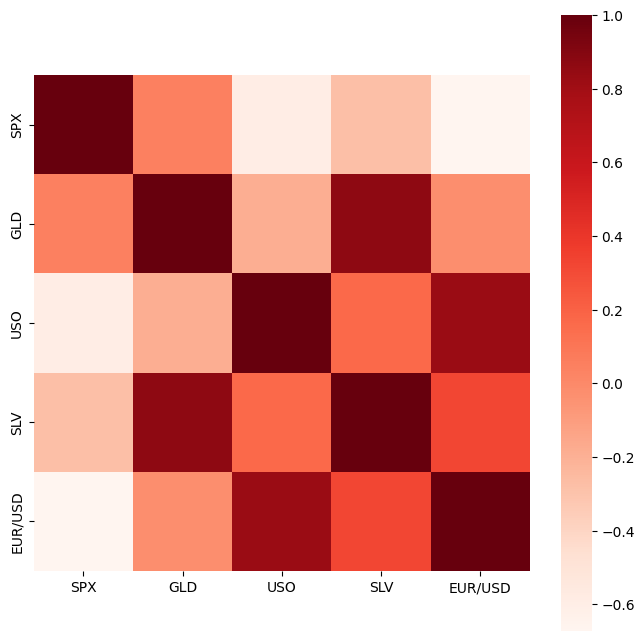

In [ ]:
# making heatmap
plt.figure(figsize = (8,8))
sns.heatmap(corelation, cbar=True, square=True,
            annot_kws={"size":8}, cmap='Reds'
            )

In [ ]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

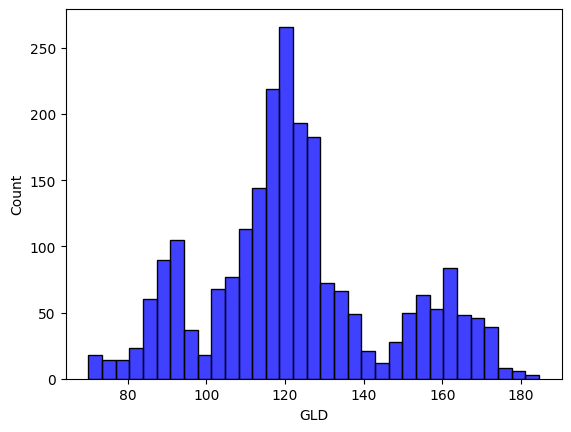

In [ ]:
# distribution of gold price
sns.histplot(gold_data['GLD'],color='blue')

In [ ]:
# spliting features (other coloumn than gold and date) and target
X = gold_data.drop(['Date','GLD'],axis = 1) # whenver droping column, for rows mention zero
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# spliting training and testing
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
#trainig
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# evalution
test_data_pred =  regressor.predict(x_test)

In [ ]:
print(test_data_pred)

[168.60089922  81.91369983 115.92080078 127.78870108 120.52560121
 154.85939789 150.40399835 126.16190069 117.3745985  126.15430033
 116.7705008  172.17180099 141.3214985  167.84609888 115.08410018
 117.64580019 137.39460374 169.97280052 158.82830371 160.67830069
 155.12710017 125.46200002 175.88749963 157.29400333 125.21720069
  93.84359985  77.05970036 120.93759997 119.01649923 167.51399994
  88.21470033 125.15859977  90.93890071 117.71489969 121.07339886
 136.07290103 115.45910144 114.87600078 144.93950028 107.01550064
 104.5189024   87.29649802 126.67270048 117.99030051 152.6122992
 119.91419994 108.35160007 108.31869787  93.06360026 127.31069735
  74.68030063 113.73409939 121.11140019 111.23609899 118.89989891
 120.46759936 159.0023997  168.0093016  147.07109708  85.82849864
  94.18080052  86.66959853  90.44580006 118.86610104 126.51910081
 127.37529958 168.77310021 122.2482992  117.40939872  98.74910049
 168.71450182 143.1679984  132.11990216 121.14490235 121.03649935
 119.574000

In [ ]:
# check error from the actual values
error_score = metrics.r2_score(y_test, test_data_pred)
print("Error values:", error_score)
# sinces the values above were in 100s and getting 98 is good :)

Error values: 0.9902516295570785


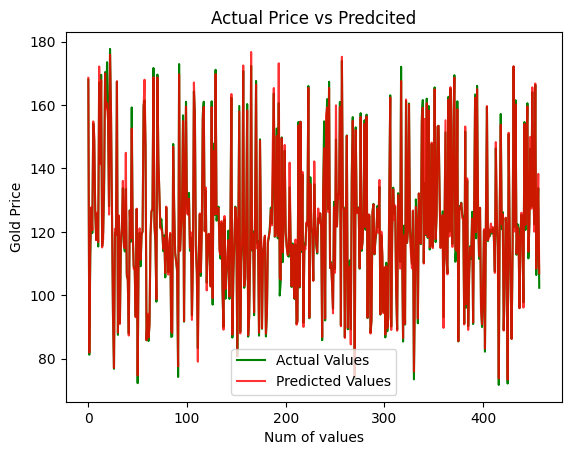

In [ ]:
#compare and predicted values
y_test = list(y_test)
plt.plot(y_test,color='green',label="Actual Values")
plt.plot(test_data_pred, color='red', alpha=0.8, label='Predicted Values')
plt.title("Actual Price vs Predcited")
plt.xlabel("Num of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [ ]:
import pickle

with open("/content/gld_data.pkl", "wb") as file:
    pickle.dump(regressor, file)

In [4]:
import sklearn
print(sklearn.__version__)

1.2.2
